In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plote

%matplotlib inline

In [3]:
# load the data
df = pd.read_csv('bank.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [57]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_category'],
      dtype='object')

In [8]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [58]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('int32')]

In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [74]:
df.drop(["duration"] , axis=1,inplace=True)
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
age_category    0
dtype: int64

In [75]:
df.replace('unknown',np.NaN,inplace=True)

In [59]:
dupls = df.duplicated()
print(dupls.any())

False


In [61]:
df.groupby('y').mean()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,age_category
y,,,,,,,,,,,,,,,,,
no,40.998000,4.379000,1.144500,1.219750,0.016750,1403.211750,0.584750,0.162000,0.695750,14.948750,5.584500,226.347500,2.862250,36.006000,0.471250,2.588750,36.422500
yes,42.491363,4.658349,1.172745,1.320537,0.017274,1571.955854,0.422265,0.082534,0.318618,14.658349,5.199616,552.742802,2.266795,68.639155,1.090211,2.332054,37.332054


In [62]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [63]:
countNo = len(df[df.y == 'no'])
countYes = len(df[df.y == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(df.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(df.y))*100)))

Percentage of "No": 88.476%
Percentage of "Yes": 11.524%


In [64]:
df._get_numeric_data().columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'age_category']

In [60]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_bank_ready = df.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank_ready[num_cols] = scaler.fit_transform(df_bank_ready[num_cols])

df_bank_ready.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_category
0,-1.056270,10,1,0,0,0.121072,0,0,0,0.374052,10,79,-0.576829,-0.407218,-0.320413,3,no,30
1,-0.772583,7,1,1,0,1.118644,1,1,0,-0.596026,8,220,-0.576829,2.989044,2.041734,0,no,30
2,-0.583458,4,2,2,0,-0.024144,1,0,0,0.010273,0,185,-0.576829,2.899143,0.270124,0,no,30
3,-1.056270,4,1,2,0,0.017726,1,1,2,-1.566105,6,199,0.387967,-0.407218,-0.320413,3,no,30
4,1.686036,1,1,1,0,-0.472753,1,0,2,-1.323585,8,226,-0.576829,-0.407218,-0.320413,3,no,50


In [22]:
# Select Features
feature = df_bank_ready.drop('y', axis=1)

# Select Target
target = df_bank_ready['y']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (3616, 51)
Shape of testing feature: (905, 51)
Shape of training label: (3616,)
Shape of training label: (905,)


In [23]:
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  "age_category"] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_category"] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_category"] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_category"] = 50
    column.loc[column["age"] >= 60, "age_category"] = 60
 
df['age_category'] = df['age_category'].astype(np.int64)
df.dtypes

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
y               object
age_category     int64
dtype: object

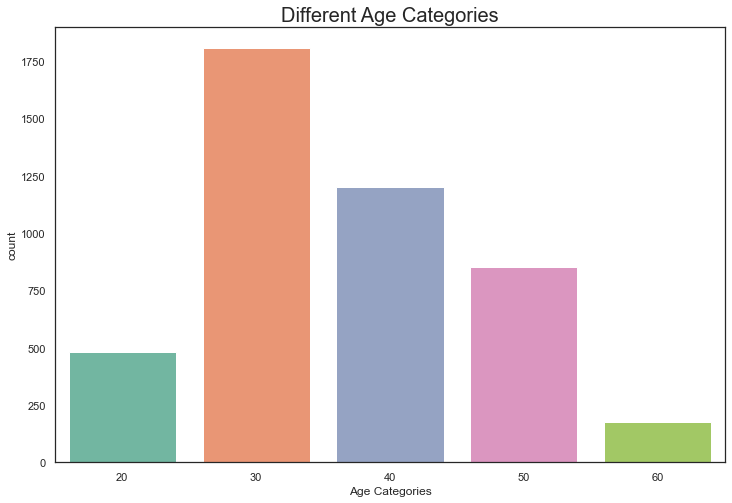

In [25]:
import seaborn as sns
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="age_category", data=df, palette="Set2")
ax.set_title("Different Age Categories", fontsize=20)
ax.set_xlabel("Age Categories")
plt.show()

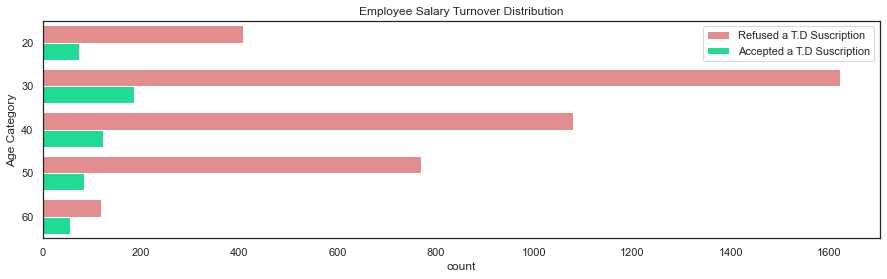

In [27]:
# There was a positive ratio of Suscribing Term Deposits  of people in their 20s (or younger) and 60s (or older)
sns.set(style="white")
fig, ax = plt.subplots(figsize=(15, 4))
colors = ["#F08080", "#00FA9A"]
labels = ['No Deposit', 'Deposit']
sns.countplot(y="age_category", hue='y', data=df, palette=colors).set_title('Employee Salary Turnover Distribution')
ax.set_ylabel("Age Category")
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Refused a T.D Suscription')
legend_name.get_texts()[1].set_text('Accepted a T.D Suscription')

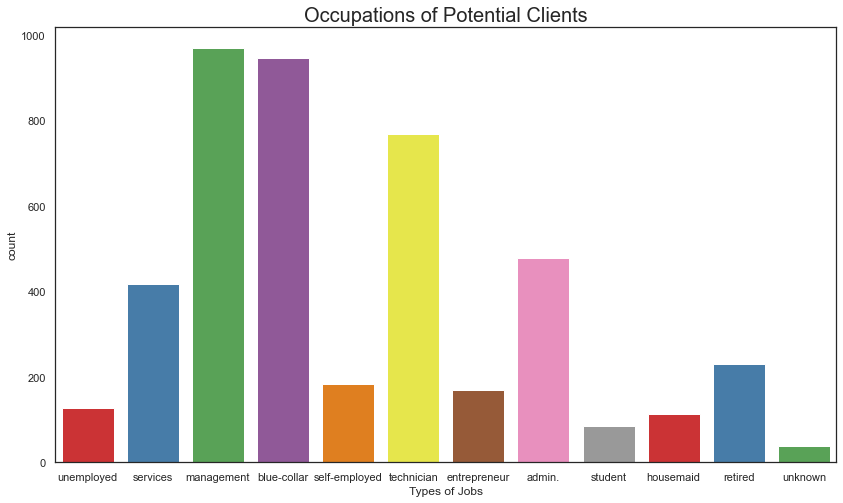

In [28]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(x="job", data=df, palette="Set1")
ax.set_title("Occupations of Potential Clients", fontsize=20)
ax.set_xlabel("Types of Jobs")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


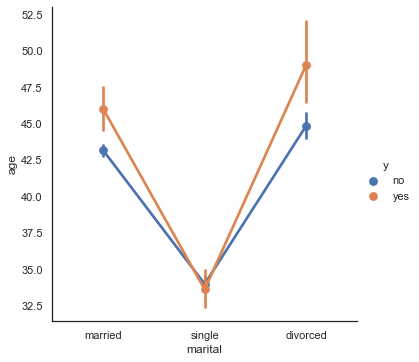

In [29]:
sns.factorplot('marital','age',hue='y',data=df )

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


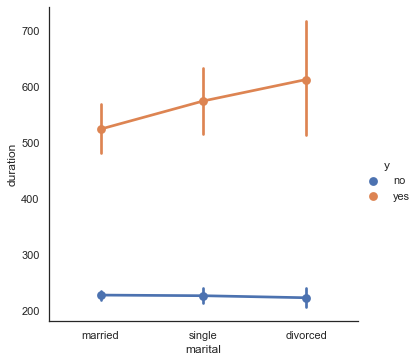

In [30]:
sns.factorplot('marital','duration',hue='y',data=df )

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


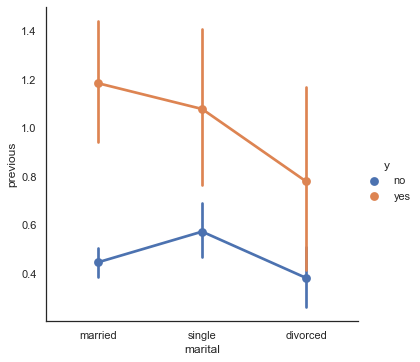

In [31]:
sns.factorplot('marital','previous',hue='y',data=df )

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


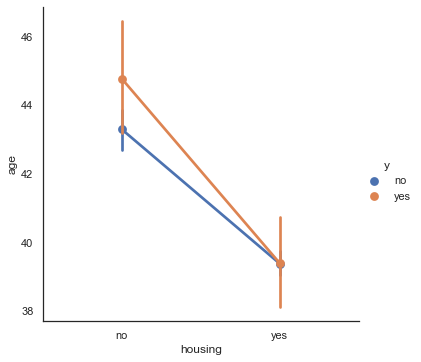

In [32]:
sns.factorplot('housing','age',hue='y',data=df )

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


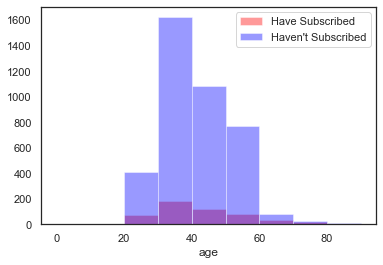

In [65]:
# Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns
bins = range(0, 100, 10)
ax = sns.distplot(df.age[df.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.age[df.y=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show()

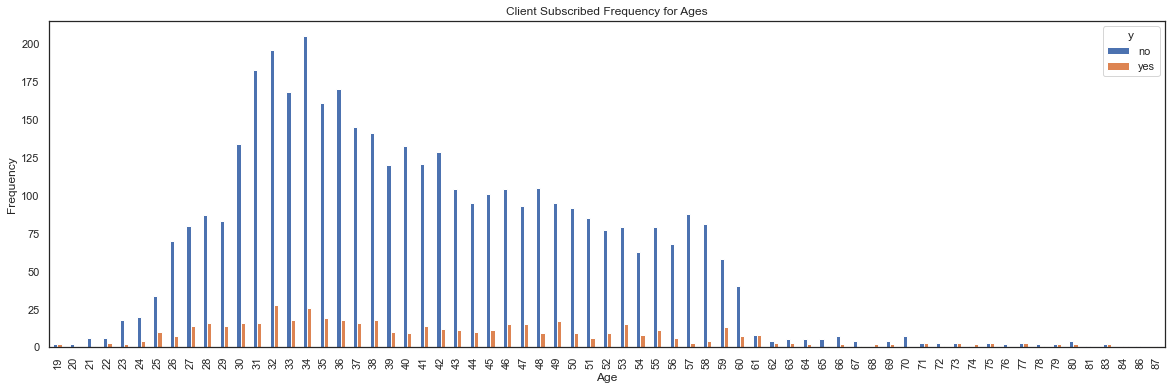

In [66]:
pd.crosstab(df.age,df.y).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

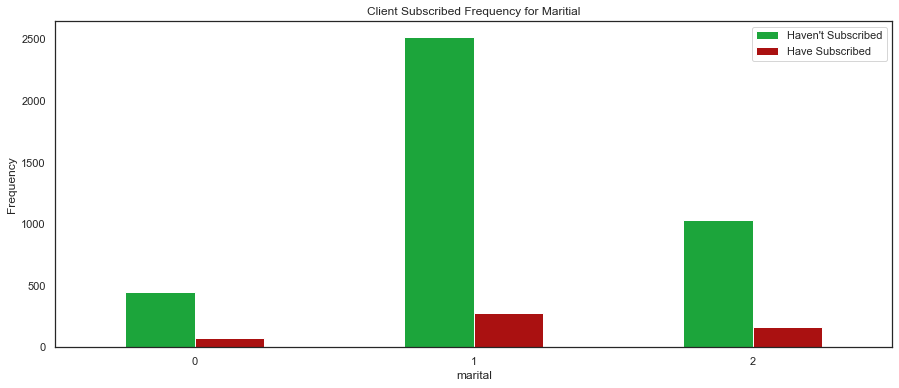

In [67]:
pd.crosstab(df.marital,df.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='y', ylabel='count'>

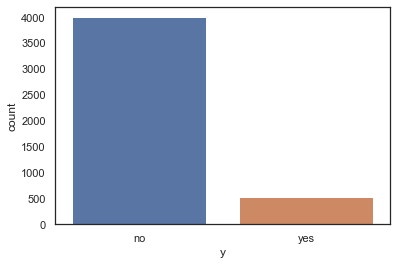

In [68]:
sns.countplot(x='y', data=df, label='Count')

<AxesSubplot:xlabel='age', ylabel='balance'>

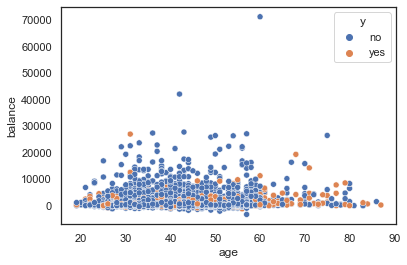

In [69]:
sns.scatterplot(x='age', y='balance',hue='y', data=df)

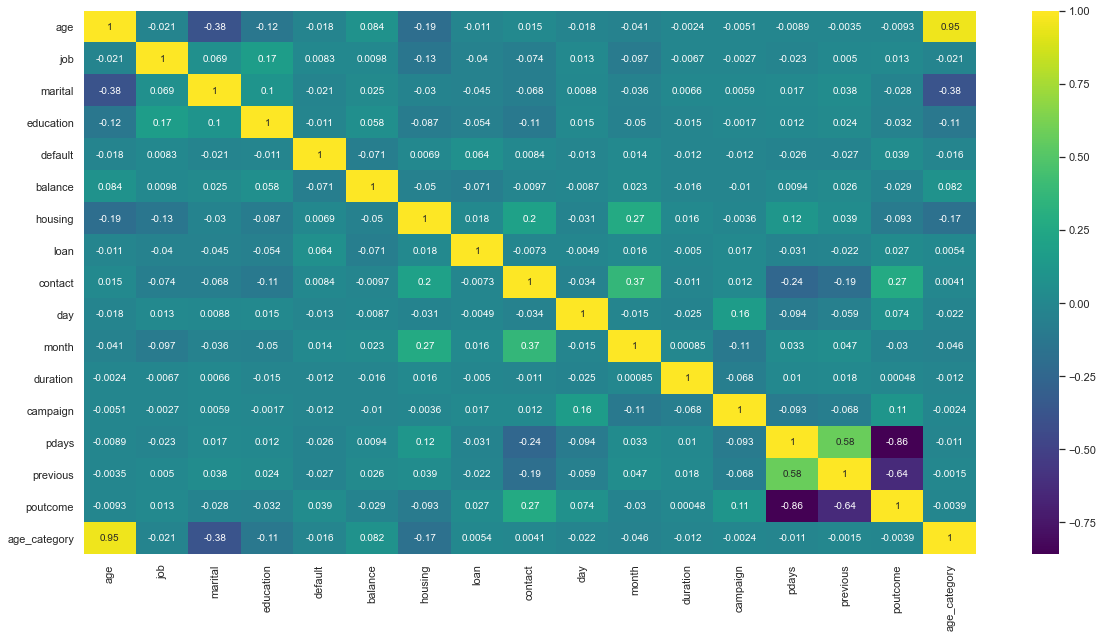

In [70]:
plt.figure(figsize = (20, 10))
corr=df.corr()
sns.heatmap(corr, annot = True, cmap="viridis")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

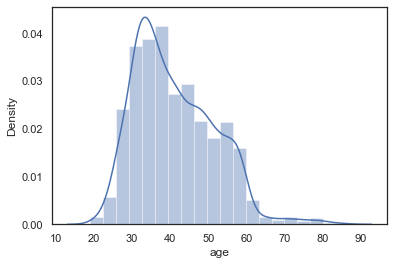

In [71]:
sns.distplot(df.age, bins = 20) 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

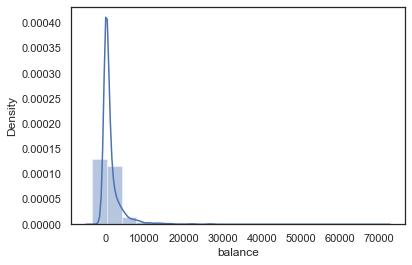

In [72]:
sns.distplot(df.balance, bins = 20)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

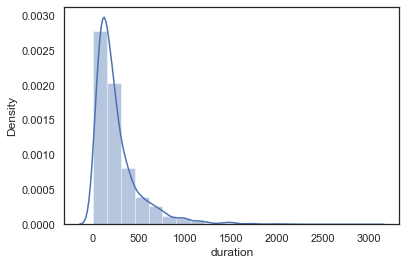

In [73]:
sns.distplot(df.duration, bins = 20) 

In [42]:
encoding_list = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day','poutcome']
df[encoding_list] = df[encoding_list].apply(LabelEncoder().fit_transform)

In [44]:
# Definiing X and Y
Y = df['y']
X = df.drop('y', axis=1)

In [45]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,Y ,test_size=0.3, random_state=2)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(3164, 17)
(1357, 17)
(3164,)
(1357,)


In [46]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
#  Model building
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [51]:
y_pre = model.predict(X_test_scaled)

In [52]:
accuracy_score(y_test, y_pre)

0.8909358879882093

In [79]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      1209
         yes       0.50      0.07      0.13       148

    accuracy                           0.89      1357
   macro avg       0.70      0.53      0.54      1357
weighted avg       0.85      0.89      0.85      1357

